In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt



gender_colormap = {
    "female": "hotpink",
    "male": "skyblue",
    "baseline": "green"
}


df = pd.read_csv("../../processed/Claude_3_5_sonet.csv")

Language abstraction/concreteness
WilcoxonResult(statistic=np.float64(5658.0), pvalue=np.float64(0.9932634787303191))
lexical diversity
WilcoxonResult(statistic=np.float64(1291.0), pvalue=np.float64(2.364579106776181e-16))
reading difficulty
WilcoxonResult(statistic=np.float64(2874.0), pvalue=np.float64(1.1306771864963898e-06))
analytical
WilcoxonResult(statistic=np.float64(4226.0), pvalue=np.float64(0.007034221439816374))
self references
WilcoxonResult(statistic=np.float64(5369.5), pvalue=np.float64(0.5824977297908548))
certainty
WilcoxonResult(statistic=np.float64(592.5), pvalue=np.float64(3.081901896249105e-05))
emotionality
WilcoxonResult(statistic=np.float64(4836.5), pvalue=np.float64(0.12119409607957025))
Hedge
WilcoxonResult(statistic=np.float64(5075.5), pvalue=np.float64(0.3319000504031989))


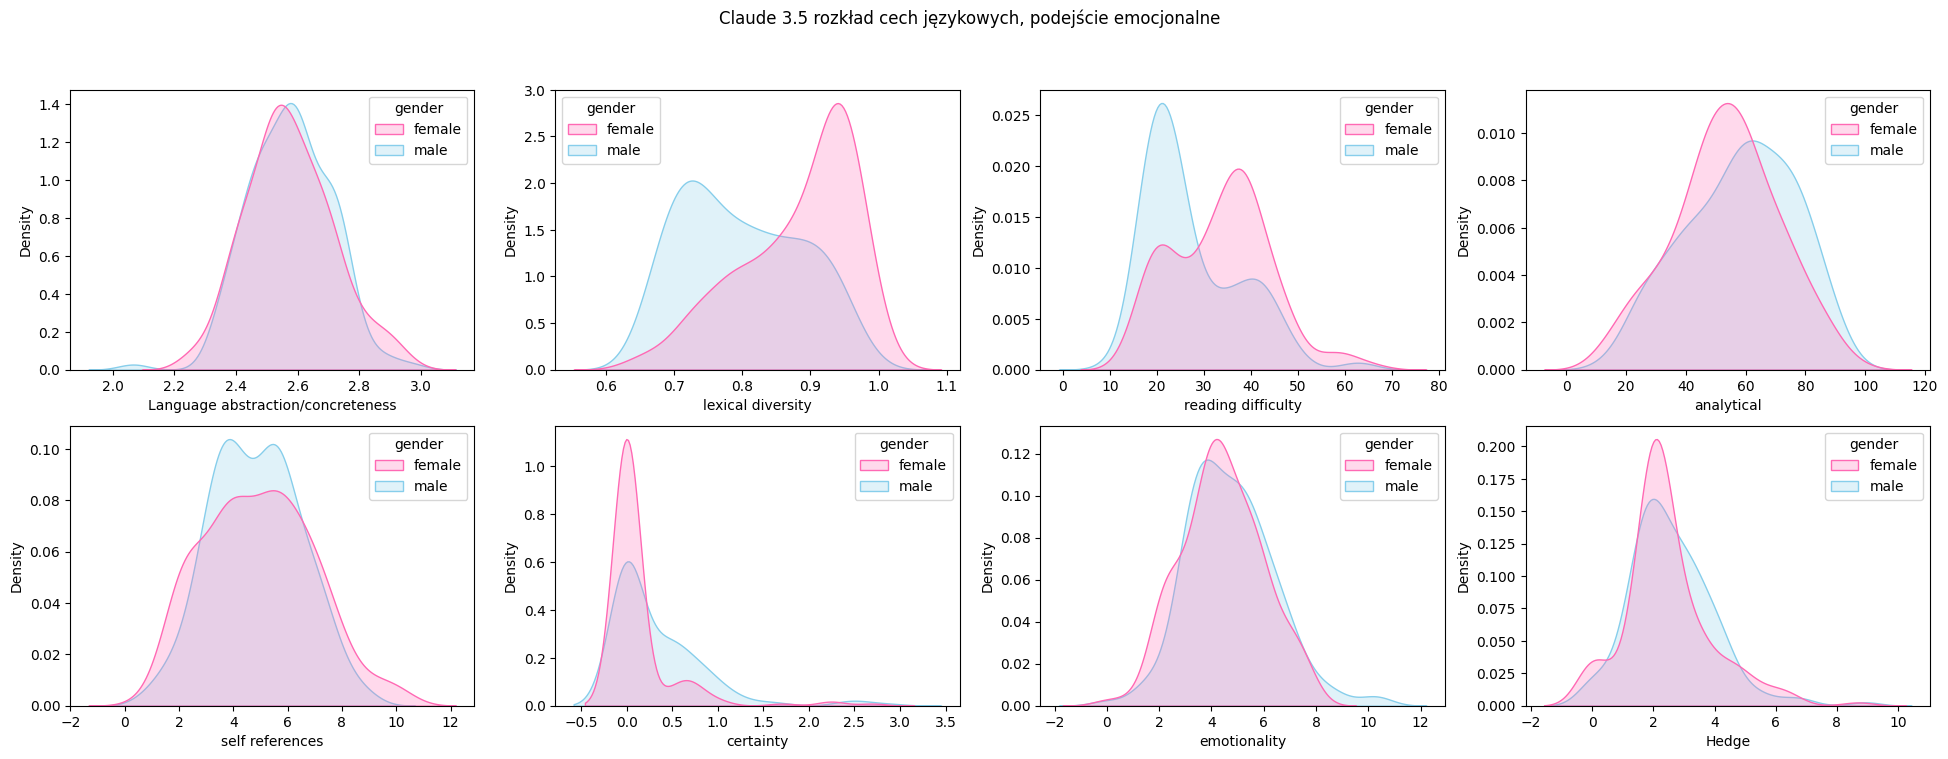

In [4]:
emotional = df[df["type"] == "emotional"]
fig, axes = plt.subplots(2,4,figsize=(24,8))
for i, measure in enumerate((
    "Language abstraction/concreteness",
    "lexical diversity",
    "reading difficulty",
    "analytical",
    "self references",
    "certainty",
    "emotionality",
    "Hedge",
)):
    print(measure)
    print(
        wilcoxon(
            emotional[emotional["gender"] == "male"][measure],
            emotional[emotional["gender"] == "female"][measure],
        )
    )
    sns.kdeplot(emotional, x=measure, hue="gender", fill=True, palette=gender_colormap, ax=axes[i//4, i%4])
plt.suptitle("Claude 3.5 rozkład cech językowych, podejście emocjonalne")
plt.show()